In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
sns.set(style="whitegrid", color_codes=True)

In [20]:
pbp = pd.read_csv('RayLopez/RLopezPlaybyPlay2.csv', keep_default_na=False)
fg = pd.read_csv('RayLopez/RayLopezFangraph.csv')
agg = pd.read_csv('RayLopez/RLopezAgg.csv')
LGpbp = pd.read_csv('LGio/LGioPlaybyPlay.csv')
pbp.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-09-27,94.5,-2.3873,5.707,Reynaldo Lopez,472528,625643,field_out,hit_into_play,...,54.1085,0,0.001,0,1,0,0,3,49,2
1,FF,2017-09-27,96,-2.6583,5.8021,Reynaldo Lopez,472528,625643,null,ball,...,54.1053,0,0,null,null,null,null,null,49,1
2,FF,2017-09-27,95,-2.5658,5.8133,Reynaldo Lopez,592743,625643,single,hit_into_play_score,...,54.2033,0.411,0.385,0.9,1,1,0,2,48,2
3,CH,2017-09-27,84,-2.4514,6.1444,Reynaldo Lopez,592743,625643,null,swinging_strike,...,54.1667,0,0,null,null,null,null,null,48,1
4,CH,2017-09-27,85.8,-2.3255,6.1248,Reynaldo Lopez,408252,625643,field_out,hit_into_play,...,54.3619,0.753,0.708,0,1,0,0,4,47,3


In [21]:
release = pbp[['release_pos_x', 'release_pos_z', 'pitch_type', 'description']]
release['release_pos_x'] = pd.to_numeric(release['release_pos_x'])
release['release_pos_z'] = pd.to_numeric(release['release_pos_z'])

lgrelease = LGpbp[['release_pos_x', 'release_pos_z', 'pitch_type', 'description']]
lgrelease['release_pos_x'] = pd.to_numeric(lgrelease['release_pos_x'])
lgrelease['release_pos_z'] = pd.to_numeric(lgrelease['release_pos_z'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

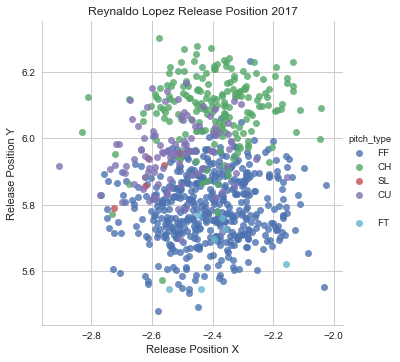

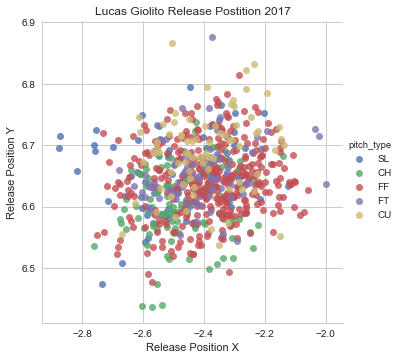

In [25]:
ax1 = sns.lmplot(data=release, x='release_pos_x', y='release_pos_z', hue='pitch_type', fit_reg=False)
ax2 = sns.lmplot(data=lgrelease, x='release_pos_x', y='release_pos_z', hue='pitch_type', fit_reg=False)

ax1.set(xlabel='Release Position X', ylabel='Release Position Y', title='Reynaldo Lopez Release Position 2017')
ax2.set(xlabel='Release Position X', ylabel='Release Position Y', title='Lucas Giolito Release Postition 2017')

ax1.savefig("Reynaldo_Lopez")
ax2.savefig("Lucas_Giolito")